MANUTENÇÃO PREDITIVA PARA EQUIPAMENTOS INDUSTRIAIS

1.OBJETIVO DO PROJETO

O objetivo desse projeto é identificar quais máquinas irão apresentar defeitos e quais os tipos de falhas para que seja feita a manutenção preditiva.

2.ENTENDIMENTO DO NEGÓCIO

A manutenção preditiva ocorre a partir de varias ineficiências que ocorre dentro da manutenção de equipamentos dentro das fabricas. Hoje a manutenção preventiva é a mais difundida, nesta definimos um certo período de tempo, número máximo de horas que uma máquina pode estar operando. Então se muitas máquinas operam com dez mil horas até apresentar a primeira falha, então poderia ser aplicado a manutenção preditiva neste período. Porém uma máquina pode funcionar até eficientemente bem e falhar bem antes deste período, então todos terão um grande problema, pois toda a linha terá que parar para realizar a manutenção daquela máquina. As áreas afetadas peloproblema, seria inicialmente a linha de montagem e respectivamnete o setor de compras. A manutenção feita antes do período para tentar salvar casos,poderíamos então estar desperdiçando recursos com máquinas que estão em perfeito estado de funcionamento. Por tanto a manutenção preditiva vem dizer quem precisa de manutenção ou não. Com base na operação, com base no estado atual de cada máquina, será indicado se a máquina vai apresentar falha e se deve fazer a manutenção dela. Ou independente da quantidade de horas de funcionamento, a máquina irá continuar operando, mas sua manutenção será indicada conforme o modelo preditivo.

3.ENTENDIMENTO DOS DADOS

Os dados que serão usados, foram coletados de documentos disponíveis para análise de dados de uma empresa fictícia. O objetivo do manuseio desses dados é de identificar, melhorar e encontrar soluções para problemas de manutenção nas máquinas do processo produtivo através de análises estatísticas e/ou inferenciais.
A completude desses dados, tem-se pela totalidade disponível em seu banco coletado durante os processos. Sobre a atualização dos dados, eles não terão alteração nos resultados por conta da forma de coleta. Essas variáveis precisarão ser tratadas sobre o seu formato, de texto para numérico. Além de todos os tipos de tratamento e limpezas necessárias em sua totalidade, para que seja possível um resultado mais completo.
As variáveis utilizadas serão: Qualidade, Temperatura do ar, temperatura do processo, Velocidade de rotação, Torque, Desgaste, Tipo de falha. Essas variáveis tiveram suas observações coletadas, ao mesmo período conforme o funcionamento do equipamento. Pode-se observar o dicionário de dados conforme a tabela a seguir.


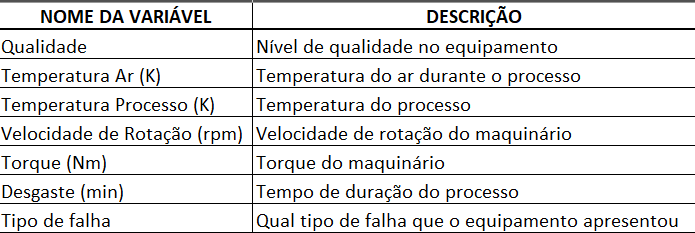

Com relação a validade dos dados, o banco não tem a presença de nulidade e tão pouco dados duplicados. Esses dados estão padronizados conforme seus tipos. Para valores textuais, não há erros de sintaxe ou formatação. 

3.1-PREPARAÇAO DOS DADOS

Para uma análise exploratória e descritiva, optamos por utilizar o Pandas Profiling, com o objetivo de realizar uma análise básica rápida, porém sobre todas as variáveis e individualmente.

As análises com destaques relevantes para o estudo foram:
Foram identificadas 4 alertas referentes as variáveis “Falha”, “Tipo de Falha”, “ID do produto” e “Desgaste”. 

Pode-se observar uma normalidade na variável “Velocidade de Rotação”, ou seja, temos que as observações estão em torno de sua média. Esse fato também ocorreu com a variável “Torque”, porém a normalidade dessa variável e perfeita, e a normalidade da variável “Velocidade de Rotação” é assimétrica positiva, deixando assim uma calda para o lado direito.

Sobre a consistência dos dados, não há inconsistência pelos campos criados pelo dataset, informação confirmada, pelo fato de tratarmos de dados fictícios. 
Sobre a irrelevância dos dados, podemos afirmar que todas as variáveis coletadas foram ditas como relevantes para os procedimentos de análises de dados.


4.ANALISE EXPLORATÓRIA DOS DADOS - ESTATISTICA DESCRITIVA

O estudo conta com 9.973 linhas de observações, com 7 variáveis e suas respectivas unidades. Além das descrições de cada variável para melhor entendimento do estudo. Neste caso, a variável Tipo de Falha, as falhas que serão estudadas são: Sem falha, Superaquecimento, Sobrecarga, Falha por potência e Desgaste.

Primeiramente iremos carregar todas as planilhas de dados, para que possamos analisar mutuamente todos os dados e variáveis em uma só tabela de dados.

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix


In [4]:
df_treino = pd.read_csv("df_treino_2.csv")
df_teste = pd.read_csv("df_teste_2.csv")

In [5]:
df_raw = pd.concat([df_treino, df_teste])
df_raw.head()

,ID Produto,Qualidade,Temperatura ar [K],Temperatura processo [K],Velocidade rotação [rpm],Torque [Nm],Desgaste [min],Falha,Tipo falha
0,B57099,Baixa,298.5,308.8,1305.0,58.7,26.0,0.0,Sem falha
1,B50640,Baixa,301.5,310.3,1415.0,41.6,28.0,0.0,Sem falha
2,B55178,Baixa,300.9,312.1,1359.0,51.7,146.0,0.0,Sem falha
3,B51337,Baixa,302.0,310.5,1263.0,60.6,90.0,1.0,Superaquecimento
4,B56278,Baixa,297.3,308.1,1468.0,49.8,0.0,0.0,Sem falha


In [6]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

In [8]:
from ydata_profiling import ProfileReport

In [9]:
df_raw.describe()

,Temperatura ar [K],Temperatura processo [K],Velocidade rotação [rpm],Torque [Nm],Desgaste [min],Falha
count,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000
mean,300.003259,310.004031,1538.893212,39.978993,107.921087,0.033089
std,2.000548,1.483692,179.412171,9.966805,63.649152,0.178879
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.700000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [10]:
profile = ProfileReport(df_raw)

In [10]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
print(df_raw.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 3291
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID Produto                9973 non-null   object 
 1   Qualidade                 9973 non-null   object 
 2   Temperatura ar [K]        9973 non-null   float64
 3   Temperatura processo [K]  9973 non-null   float64
 4   Velocidade rotação [rpm]  9973 non-null   float64
 5   Torque [Nm]               9973 non-null   float64
 6   Desgaste [min]            9973 non-null   float64
 7   Falha                     9973 non-null   float64
 8   Tipo falha                9973 non-null   object 
dtypes: float64(6), object(3)
memory usage: 779.1+ KB
None


In [12]:
print(df_raw.isna().sum())

ID Produto                  0
Qualidade                   0
Temperatura ar [K]          0
Temperatura processo [K]    0
Velocidade rotação [rpm]    0
Torque [Nm]                 0
Desgaste [min]              0
Falha                       0
Tipo falha                  0
dtype: int64


In [13]:
display(df_raw.loc[df_raw['Desgaste [min]']==0])

,ID Produto,Qualidade,Temperatura ar [K],Temperatura processo [K],Velocidade rotação [rpm],Torque [Nm],Desgaste [min],Falha,Tipo falha
4,B56278,Baixa,297.3,308.1,1468.0,49.8,0.0,0.0,Sem falha
35,M21705,Média,301.3,311.5,1648.0,32.4,0.0,0.0,Sem falha
79,M21201,Média,300.4,309.8,1421.0,47.2,0.0,0.0,Sem falha
176,B51997,Baixa,303.5,312.1,1674.0,30.8,0.0,0.0,Sem falha
182,B48602,Baixa,298.7,309.8,1530.0,35.5,0.0,0.0,Sem falha
...,...,...,...,...,...,...,...,...,...
2817,B51302,Baixa,302.2,310.6,1462.0,43.6,0.0,0.0,Sem falha
2844,M16543,Média,297.9,307.4,1403.0,52.8,0.0,0.0,Sem falha
2851,B56355,Baixa,297.8,309.0,1403.0,64.2,0.0,1.0,Falha por potência
2876,B47854,Baixa,297.8,309.0,1456.0,41.2,0.0,0.0,Sem falha


In [14]:
df_raw.duplicated().sum()

0

In [15]:
df_raw.describe()

,Temperatura ar [K],Temperatura processo [K],Velocidade rotação [rpm],Torque [Nm],Desgaste [min],Falha
count,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000
mean,300.003259,310.004031,1538.893212,39.978993,107.921087,0.033089
std,2.000548,1.483692,179.412171,9.966805,63.649152,0.178879
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.700000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [16]:
!pip install matplotlib

In [17]:
!pip install seaborn

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='dark', palette='bright', context='notebook')



In [18]:
df_raw.head()

,ID Produto,Qualidade,Temperatura ar [K],Temperatura processo [K],Velocidade rotação [rpm],Torque [Nm],Desgaste [min],Falha,Tipo falha
0,B57099,Baixa,298.5,308.8,1305.0,58.7,26.0,0.0,Sem falha
1,B50640,Baixa,301.5,310.3,1415.0,41.6,28.0,0.0,Sem falha
2,B55178,Baixa,300.9,312.1,1359.0,51.7,146.0,0.0,Sem falha
3,B51337,Baixa,302.0,310.5,1263.0,60.6,90.0,1.0,Superaquecimento
4,B56278,Baixa,297.3,308.1,1468.0,49.8,0.0,0.0,Sem falha


In [19]:
colunas_numericas = df_raw.select_dtypes(include='number').columns
colunas_categoricas = df_raw.select_dtypes(exclude='number').columns
colunas_categoricas = colunas_categoricas.drop('Tipo falha','Qualidade')

In [20]:
df_raw.head()

,ID Produto,Qualidade,Temperatura ar [K],Temperatura processo [K],Velocidade rotação [rpm],Torque [Nm],Desgaste [min],Falha,Tipo falha
0,B57099,Baixa,298.5,308.8,1305.0,58.7,26.0,0.0,Sem falha
1,B50640,Baixa,301.5,310.3,1415.0,41.6,28.0,0.0,Sem falha
2,B55178,Baixa,300.9,312.1,1359.0,51.7,146.0,0.0,Sem falha
3,B51337,Baixa,302.0,310.5,1263.0,60.6,90.0,1.0,Superaquecimento
4,B56278,Baixa,297.3,308.1,1468.0,49.8,0.0,0.0,Sem falha


ANÁLISE E IDENTIFICAÇÃO DA DISPERSÃO E VARIABILIDADE DOS DADOS - BOXPLOT

Neste momento iremos analisar estes as variáveis, utilizando o gráfico Boxplot, para informar a existência de outlier nas observações, a dispersão das variáveis com suas observações e a concentração delas em torno da mediana. Essas análises são realizadas verificando os gráficos de Box-Plot e a tabela de informações estatísticas básicas, como mínimo, máximo e mediana.

Realizando a analise rápida, observamos que as maiores dicrepancias estão nas variáveis Velocidade de Rotação e Torque

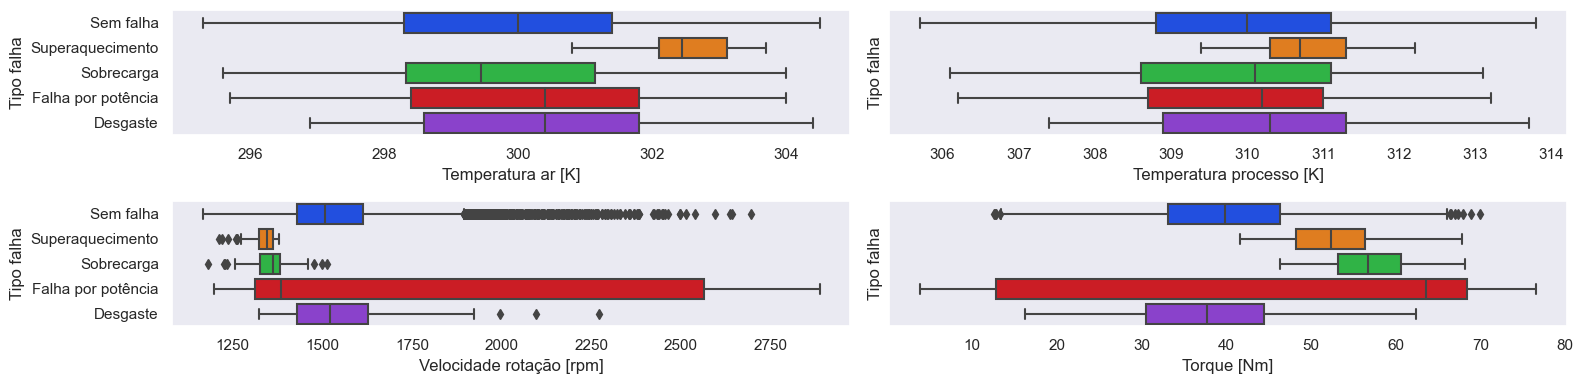

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 4), tight_layout=True, sharey=True)

for i, ax  in enumerate(axes.flatten()):
    if i == len(colunas_numericas): # porque deixei 4 espaços, mas só tenho 3 colunas
        break 
    sns.boxplot(x=colunas_numericas[i], y='Tipo falha', data=df_raw, ax=ax)

plt.show()

ANÁLISE NO PROPORÇÃO DE MÁQUINAS COM FALHA E MÁQUINAS SEM FALHA - HISTOGRAMA

Text(0.5, 1.0, 'Proporção')

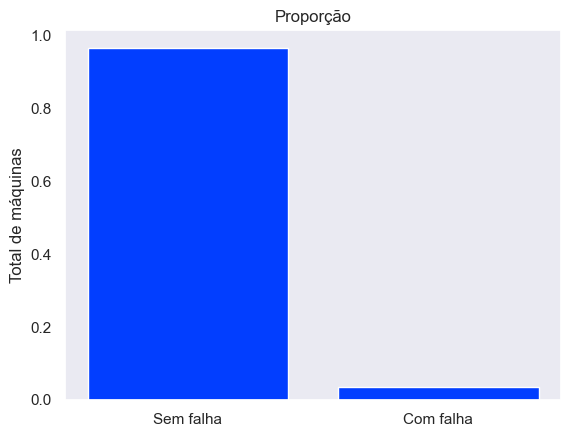

In [22]:
# copiando df para a EDA

df_eda = df_treino.copy()


total_falhas = df_eda['Falha'].value_counts(normalize=True)

plt.bar(x=total_falhas.index, height=total_falhas)
plt.xticks([0,1],['Sem falha', 'Com falha'])
plt.ylabel('Total de máquinas')
plt.title('Proporção')

In [23]:
import plotly.express as px


In [24]:
fig  = px.scatter(df_eda, x = 'Falha', y = 'Desgaste [min]',log_x = True, width = 800)
fig.update_traces(marker = dict(size = 12),line=dict(width = 2)),selector = dict(mode = 'markers')|
fig.update_layout(title = 'Gráfico de Dispersão entre variavel Qualidade e Falha')
fig.update_xaxes(title = 'Log(Qualidade)')
fig.update_yaxes(title = 'Falha')
fig.show()

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (3093596741.py, line 2)

IDENTIFICAÇÃO DE PRESENÇA DE CORRELAÇÃO ENTRE VARIAVEIS -  CORRELAÇÃO

Identificou-se a correlação negativa entre a variável Velocidade de Rotação e Torque. Também alta correlação positiva entre as variáveis Temperaturas do Ar e temperatura do processo. E não foi identificada qualquer correlação entre outras variáveis.

C:\Users\mariz\AppData\Local\Temp\ipykernel_19364\134250870.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_falhas = df_eda.corr()


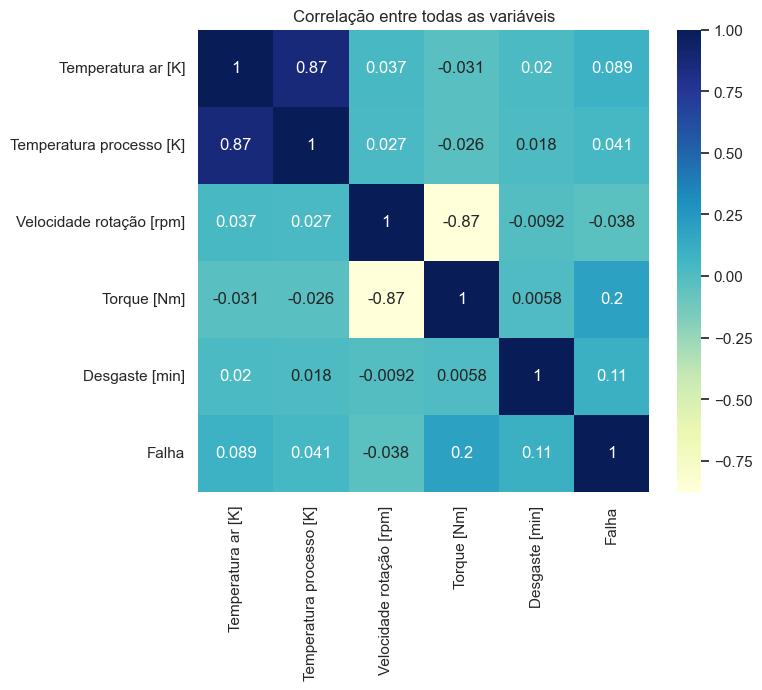

In [25]:
corr_falhas = df_eda.corr()

ax = plt.figure(figsize=(16,6))

ax = plt.subplot(1,2,1)
ax = sns.heatmap(corr_falhas, annot=True, cmap= "YlGnBu")
plt.title("Correlação entre todas as variáveis")

plt.show()

DISPERSÃO ENTRE VARIAVEIS VELOCIDADE DE ROTAÇÃO E TORQUE 

O Gráfico abaixo nos mostra que, o quanto maior for a velocidade, menor será o torque. E podemos observar que a maioria das observações onde o torque está em uma escala de 30 a 60Nm, a velocidade encontra-se em torno de 1500 a 1750[rpm].  Ou seja, o torque tende a aumentar quando a velocidade de rotação é menor.

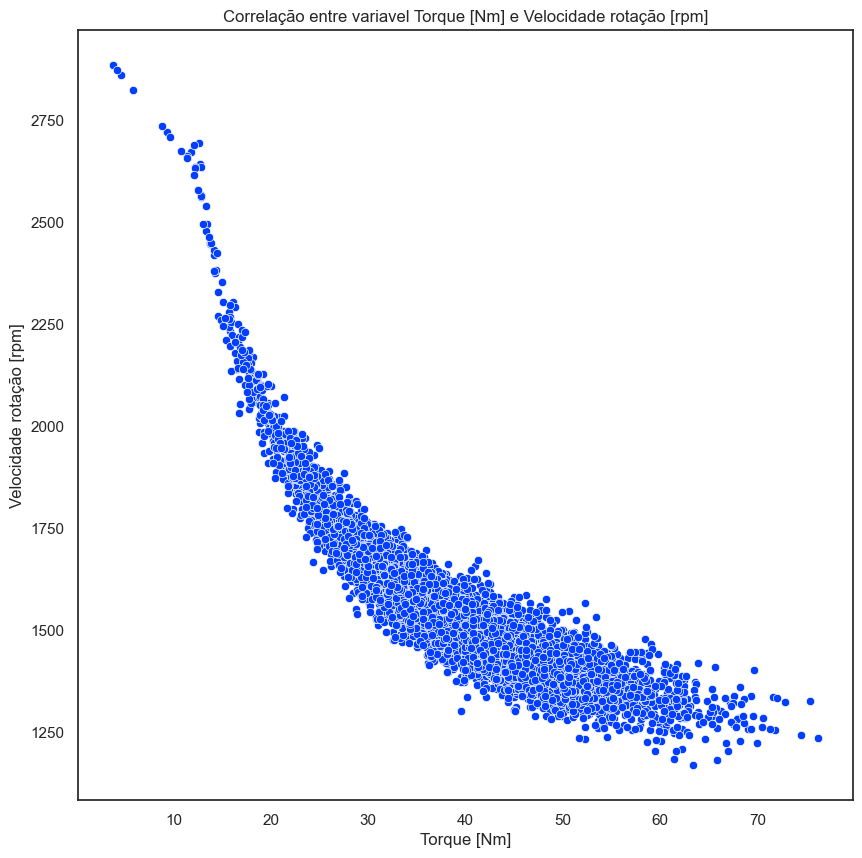

In [26]:

import seaborn as sns
import matplotlib.pyplot as plt

# Criando o ambiente do gráfico 
sns.set_style("white")
plt.figure(figsize=(10, 10))

# Gráfico de Dispersão
g = sns.scatterplot(x="Torque [Nm]", y="Velocidade rotação [rpm]", 
                    data=df_eda)
g.set_title("Correlação entre variavel Torque [Nm] e Velocidade rotação [rpm]")
plt.show()

COMPARAÇÃO SOBRE A QUALIDADE DE VARIAVEIS MÁQUINAS QUE FALHARAM E DAS MÁQUINAS QUE NÃO FALHARAM

In [27]:
falha_qualidade = df_eda.groupby("Qualidade")['Falha'].agg(['sum','count','mean'])
falha_qualidade

,sum,count,mean
Qualidade,,,
Alta,12.0,665,0.018045
Baixa,162.0,3979,0.040714
Média,52.0,2037,0.025528


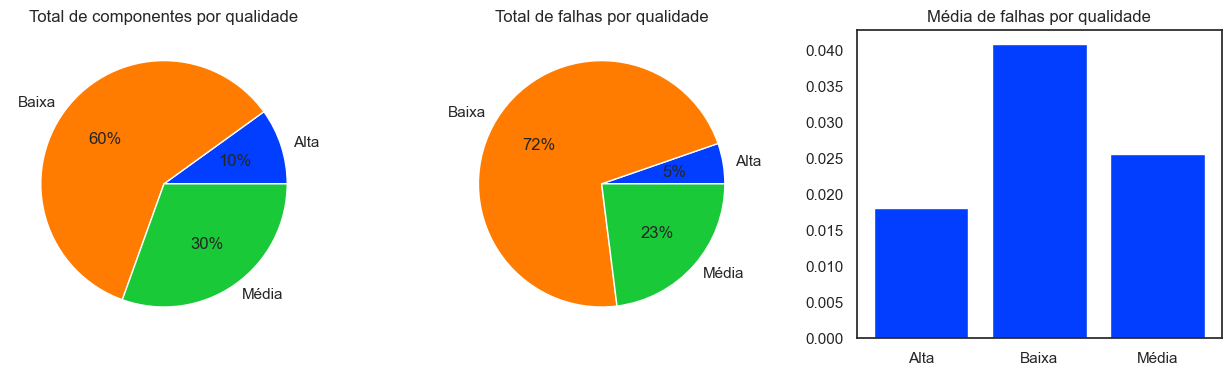

In [28]:
# Total de componentes por qualidade

ax = plt.figure(figsize=(16,4))
ax = plt.subplot(1,3,1)
ax = plt.pie(falha_qualidade['count'], labels=falha_qualidade.index, autopct='%.0f%%')
plt.title("Total de componentes por qualidade")

# Total de falhas por tipo de componente - Volume total

ax = plt.subplot(1,3,2)
ax = plt.pie(falha_qualidade['sum'], labels=falha_qualidade.index, autopct='%.0f%%')
plt.title("Total de falhas por qualidade")

# Média das falhas por tipo de componente
ax = plt.subplot(1,3,3)
ax = plt.bar(height=falha_qualidade['mean'], x=falha_qualidade.index)
plt.title("Média de falhas por qualidade")

plt.show()

In [29]:
df_temp = df_eda[['Temperatura ar [K]', 'Temperatura processo [K]', 'Falha']]

# coluna da diferença entre temperaturas
df_temp['var_temperatura'] = df_temp['Temperatura processo [K]'] - df_temp['Temperatura ar [K]']

df_temp_falhou = df_temp[df_temp['Falha'] == 1]
df_temp_semfalha = df_temp[df_temp['Falha'] == 0]

C:\Users\mariz\AppData\Local\Temp\ipykernel_19364\2872848124.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['var_temperatura'] = df_temp['Temperatura processo [K]'] - df_temp['Temperatura ar [K]']


O conjunto de Gráficos, nos mostra a comparação em entre o total de máquinas que falharam e o total de máquinas que não falharam, por temperatura. Podemos observar que o gráfico que mostra as máquinas que não falharam, existe uma leve normalidade entre as observações com um intervalo de temperatura de 308k a 312k, ou seja, nos permitindo classificar as máquinas que não falharam na quantidade entre a maioria pouco acima de 1000 máquinas.

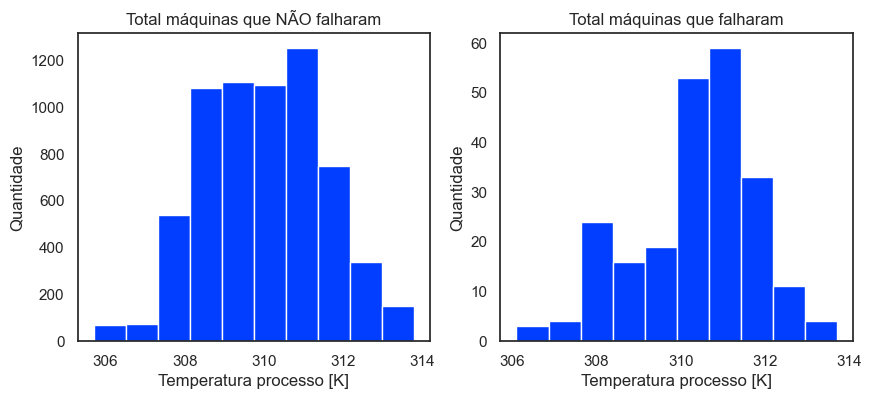

In [30]:
# Análise com base na temperatura do processo

ax = plt.figure(figsize=(10,4))

# total de componentes
ax = plt.subplot(1,2,1)
ax = plt.hist(df_temp_semfalha['Temperatura processo [K]'])
plt.title("Total máquinas que NÃO falharam")
plt.xlabel("Temperatura processo [K]")
plt.ylabel("Quantidade")

# média das falhas por componente
ax = plt.subplot(1,2,2)
ax = plt.hist(df_temp_falhou['Temperatura processo [K]'])
plt.title("Total máquinas que falharam")
plt.xlabel("Temperatura processo [K]")
plt.ylabel("Quantidade")


plt.show()

Aqui respondemos as perguntas de negócio com pouco mais de embasamento, sim equipamentos sujeitos a maiores temperaturas tem mais falha, a temperaturas superiores a 310k. E sobre a temperatura ambiente e temperatura do processo, não possuem mais falhas.

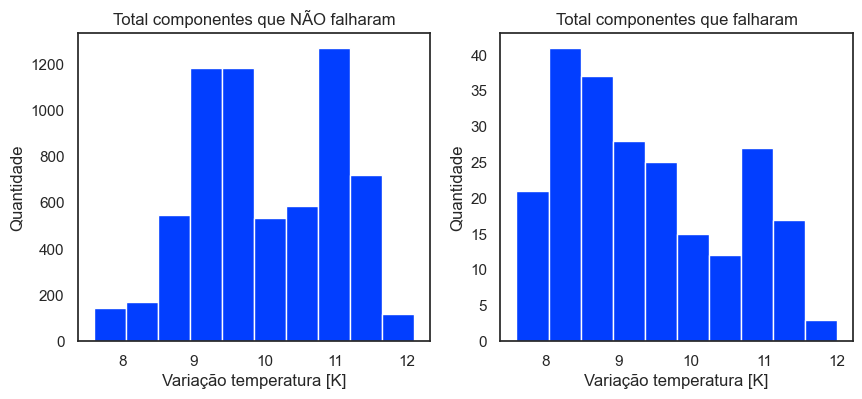

In [31]:
# Análise com base na diferença entre temperaturas

ax = plt.figure(figsize=(10,4))

# total de componentes
ax = plt.subplot(1,2,1)
ax = plt.hist(df_temp_semfalha['var_temperatura'])
plt.title("Total componentes que NÃO falharam")
plt.xlabel("Variação temperatura [K]")
plt.ylabel("Quantidade")

# média das falhas por componente
ax = plt.subplot(1,2,2)
ax = plt.hist(df_temp_falhou['var_temperatura'])
plt.title("Total componentes que falharam")
plt.xlabel("Variação temperatura [K]")
plt.ylabel("Quantidade")

plt.show()

CORRELAÇÃO ENTRE A VARIÁVEL TORQUE E VELOCIDADE DE ROTAÇÃO

Então respondendo à pergunta de negócio, observamos que a maior parte das falhas ocorre em componentes sujeitos a alta rotação e baixo torque ou alto torque e baixa rotação. Por tanto a velocidade de rotação é menor, temos um torque maior, e quando a velocidade de rotação é maior, o torque é bem menor.

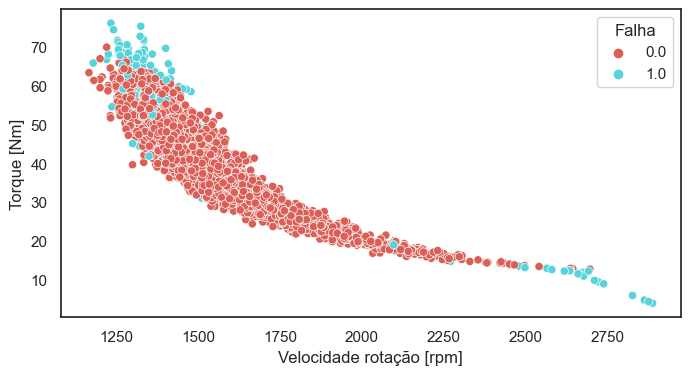

In [32]:
# Relação entre Torque, Velocidade de Rotação e a Falha

plt.figure(figsize=(8,4))

sns.scatterplot(x='Velocidade rotação [rpm]', y='Torque [Nm]', palette='hls',hue='Falha', data=df_eda)

plt.show()

PRÉ-PROCESSAMENTO DOS DADOS, PARA ESCOLHA DO MODELO

Nesta etapa de análise, padronizaremos as observações para melhor trabalhar na criação dos modelos. Realizaremos a troca de formato das observações para o modelo conseguir identificar os dados e analisá-los de forma mais correta possível.
Para esse procedimento criaremos variáveis para melhor análise, faremos a manipulação dessas colunas, bem como a retirada de variáveis que para o momento não serão de grande utilidade.


In [33]:
# criação de novas colunas
df_treino['var_temperatura'] = df_treino['Temperatura processo [K]'] - df_treino['Temperatura ar [K]']

df_treino.head()

,ID Produto,Qualidade,Temperatura ar [K],Temperatura processo [K],Velocidade rotação [rpm],Torque [Nm],Desgaste [min],Falha,Tipo falha,var_temperatura
0,B57099,Baixa,298.5,308.8,1305.0,58.7,26.0,0.0,Sem falha,10.3
1,B50640,Baixa,301.5,310.3,1415.0,41.6,28.0,0.0,Sem falha,8.8
2,B55178,Baixa,300.9,312.1,1359.0,51.7,146.0,0.0,Sem falha,11.2
3,B51337,Baixa,302.0,310.5,1263.0,60.6,90.0,1.0,Superaquecimento,8.5
4,B56278,Baixa,297.3,308.1,1468.0,49.8,0.0,0.0,Sem falha,10.8


In [34]:
# manipulação das colunas
dummy_treino = pd.get_dummies(df_treino['Qualidade'])

dummy_treino.head()

,Alta,Baixa,Média
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [35]:
def pipeline(df):
    df['var_temperatura'] = df['Temperatura processo [K]'] - df['Temperatura ar [K]']

    dummy = pd.get_dummies(df['Qualidade'])
    df = pd.concat([df.drop('Qualidade', axis=1), dummy], axis=1)

    return df

In [36]:
df_treino = pipeline(df_treino)
df_teste = pipeline(df_teste)

df_treino.head()

,ID Produto,Temperatura ar [K],Temperatura processo [K],Velocidade rotação [rpm],Torque [Nm],Desgaste [min],Falha,Tipo falha,var_temperatura,Alta,Baixa,Média
0,B57099,298.5,308.8,1305.0,58.7,26.0,0.0,Sem falha,10.3,0,1,0
1,B50640,301.5,310.3,1415.0,41.6,28.0,0.0,Sem falha,8.8,0,1,0
2,B55178,300.9,312.1,1359.0,51.7,146.0,0.0,Sem falha,11.2,0,1,0
3,B51337,302.0,310.5,1263.0,60.6,90.0,1.0,Superaquecimento,8.5,0,1,0
4,B56278,297.3,308.1,1468.0,49.8,0.0,0.0,Sem falha,10.8,0,1,0


In [37]:
cols_drop = ['ID Produto','Tipo falha', 'Falha']

X_treino = df_treino.drop(columns = cols_drop)
X_teste = df_teste.drop(columns = cols_drop)

y_treino = df_treino['Tipo falha']
y_teste = df_teste['Tipo falha']

INTELIGENCIA ARTIFICIAL – MODELO DecisionTreeClassifier

O modelo DecisionTreeClassifier é um modelo de aprendizado de máquina que usa uma árvore de decisão para classificar dados, é simples, rápido para treinar e fácil de interpretar. Não é tão preciso, pois é mais propenso ao overfitting, por isso é menos robusto a outliers e ruído nos dados. Seu uso é mais apropriado junto com outros modelos com métricas ou parâmetros diferentes.
Já o RandomForestClassifier é um modelo de ensemble, ou seja, combina várias árvores de decisão. Possui uma alta precisão, pois reduz o overfitting aumentando a generalização e a robustez a outliers e a ruído nos dados. Ao contrário do modelo DecisionTreeClassifier é um pouco lento para treinar, mais difícil de interpretar, porém suas vantagens ainda estão na maioria.
Por tanto para nosso projeto, o modelo utilizado será o modelo RandomForestClassifier, pois este pode realizar uma análise equilibrada, pois podemos contar com métricas que farão análises de predição de diversas formas.


In [38]:
# random forest

forest = RandomForestClassifier(class_weight='balanced')
forest.fit(X_treino,y_treino)

forest.predict(X_teste)

array(['Sem falha', 'Sem falha', 'Sem falha', ..., 'Sem falha',
       'Sem falha', 'Sem falha'], dtype=object)

In [39]:
y_proba = forest.predict_proba(X_teste)

roc_auc_score(y_teste, y_proba, multi_class = 'ovo', average='weighted')

0.9497559179218736

RESULTADOS DO MODELO

Analisando os resultados do modelo RandomForestClassifier, a partir da métrica roc_auc_score, observamos o valor 0,94 gerado pelo modelo, referente ao percentual 94%. O que significa que o modelo consegue distinguir mais de 94% dos dados, classificando-os de forma correta.

INTELIGENCIA ARTIFICIAL – MODELO K-Nearest Neighbors (KNN)

é um modelo de aprendizado de máquina em Python que implementa o algoritmo K-Nearest Neighbors (KNN). O KNN é um algoritmo de classificação supervisionado que utiliza a similaridade entre os dados para prever a classe de um novo ponto de dados.

In [40]:
# kneigh

knn = KNeighborsClassifier()
knn.fit(X_treino, y_treino)

y_proba = knn.predict_proba(X_teste)

roc_auc_score(y_teste, y_proba, multi_class = 'ovo', average='weighted')

0.7648615314165327

RESULTADOS DO MODELO

Analisando o modelo KNeighborsClassifier, também a partir da mesma métrica roc_auc_score, o valor observado foi bem inferior 0,74 referente a 74%. Esse percentual fica significa que o modelo ainda é capaz de distinguir entre as classes com algum grau de sucesso, pois o valor não está tão próximo de 1.

CONCLUSÃO

Analisando os dois modelos, conseguimos entender que o melhor modelo RandomForestClassifier, o qual possui 94%. O que significa que o modelo consegue distinguir mais de 94% dos dados, classificando-os de forma correta.